<a href="https://colab.research.google.com/github/Toshi-M56/testRepository/blob/main/Machine_Learning_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3,suppress=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 線形回帰

$y = w_0 + w_1 x$ でデータを予測．

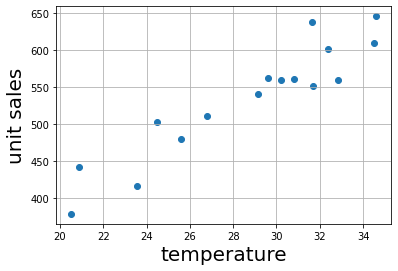

In [ ]:
np.random.seed(13)
x1 = 20 + 15 * np.random.rand(16)
t1 = 100 +15 * x1 + 30 * np.random.randn(16)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x1, t1)
ax.grid()
ax.set_xlabel("temperature", fontsize=20)
ax.set_ylabel("unit sales", fontsize=20)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), t1) 
print(model1.intercept_) # 切片 
print(model1.coef_) # 傾き

81.6747099695067
[15.803]


Text(0, 0.5, 'unit sales')

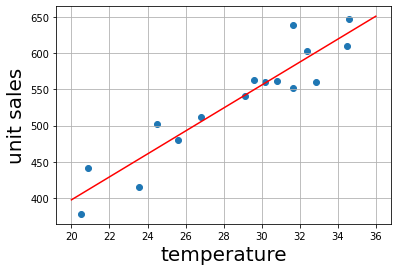

In [ ]:
xx1 = np.arange(20, 37)
y_regression_line = model1.coef_ * xx1 + model1.intercept_
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x1, t1)
ax.plot(xx1, y_regression_line, c="red")
ax.grid()
ax.set_xlabel("temperature", fontsize=20)
ax.set_ylabel("unit sales", fontsize=20)

In [ ]:
x_test_data = [[28], [34]]
y_pred = model1.predict(x_test_data) 
print(y_pred) # x=28, x=34に対する予測結果

[524.166 618.985]


# 2. 二次元入力の線形回帰
$y = w_0 + w_1 x_1 + w_2 x_2$ でデータを予測



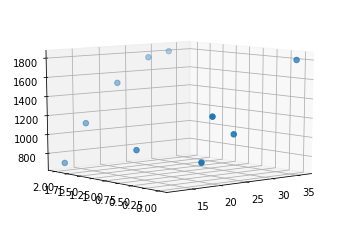

In [ ]:
from sklearn.linear_model import LinearRegression
import mpl_toolkits.mplot3d.art3d as art3d

X2 = np.array([[12, 2],[16, 1],[20, 0],[28, 2],[36, 0],[16, 2],[18, 0],[22, 2],[32, 2],[24, 0]])
t2 = np.array([[700],[900],[1300],[1750],[1800],[1100],[850],[1500],[1800],[1100]])

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], t2.flatten(), s=30)
ax.view_init(elev=10, azim=230)
fig.show()

傾き [[ 51.313 118.388]]
切片 [0.358]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


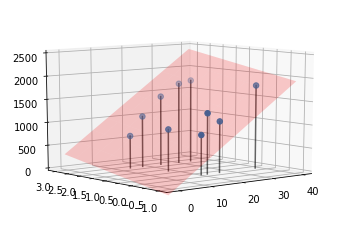

In [ ]:
model2 = LinearRegression()
model2.fit(X2,t2)

print("傾き", model2.coef_) 
print("切片", model2.intercept_) 
a = model2.coef_[0,0]
b = model2.coef_[0,1]
c = model2.intercept_
xx_2d, yy_2d = np.meshgrid(
    np.linspace(-1.0, 40.0, 10), np.linspace(-1.0, 3.0, 10))
regression_surf = a * xx_2d + b * yy_2d + c

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx_2d, yy_2d, regression_surf, color = "red", alpha=0.2)
ax.scatter3D(X2[:,0], X2[:,1], t2.flatten(), s=30)
for i, pos in enumerate(X2):
    line= art3d.Line3D([pos[0],pos[0]],[pos[1], pos[1]],[0, t2[i]], color='black', alpha=0.6)
    ax.add_line(line)
ax.set_zlim([0, 2500])
ax.view_init(elev=10, azim=230)
plt.show()

#3. 多項式回帰

$y = w_0 + w_1 x + w_2 x^2 \cdots w_n x^n$ でデータを予測．

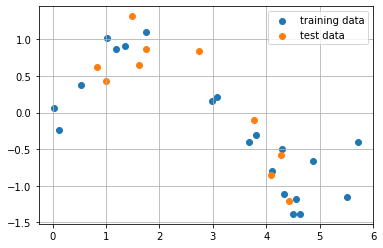

In [ ]:
np.random.seed(10)
N = 20
x3 = np.sort(np.random.uniform(0,6,N))
t3 = np.sin(x3) + np.random.uniform(-0.5,0.5,N)
x3_test = np.sort(np.random.uniform(0,5,N//2))
t3_test = np.sin(x3_test) + np.random.uniform(-0.5,0.5,N//2)
pred_x = np.arange(0, 6, 0.1)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x3,t3,  label="training data")
ax.scatter(x3_test,t3_test,  label="test data")
ax.legend()
ax.grid()
plt.show()

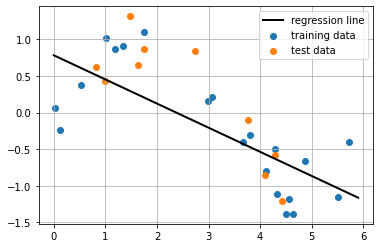

In [ ]:
model3_1 = LinearRegression()
model3_1.fit(x3.reshape(-1, 1), t3)

pred_y = model3_1.predict(pred_x.reshape(-1, 1))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x3,t3, label="training data")
ax.plot(pred_x, pred_y,color='black', label="regression line", lw=2)
ax.scatter(x3_test,t3_test,label="test data")
ax.legend()
ax.grid()
plt.show()

## 2次多項式回帰

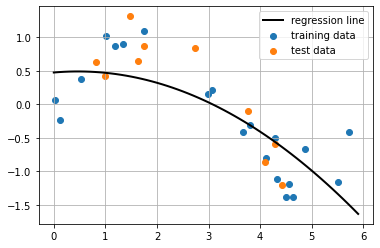

In [ ]:
poly_2 = PolynomialFeatures(2) # 次数が2
poly_X = poly_2.fit_transform(x3.reshape(-1, 1))
model3_2 = LinearRegression()
model3_2.fit(poly_X, t3)

pred_poly_X = poly_2.fit_transform(pred_x.reshape(-1, 1))
pred_y = model3_2.predict(pred_poly_X)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x3,t3,  label="training data")
ax.scatter(x3_test,t3_test,  label="test data")
ax.plot(pred_x, pred_y,color='black', label="regression line", lw=2)
ax.grid()
ax.legend()
plt.show()

##3次多項式回帰

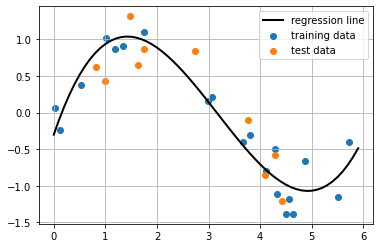

In [ ]:
poly_3 = PolynomialFeatures(3) # 次数が3
poly_X = poly_3.fit_transform(x3.reshape(-1, 1))
model3_3 = LinearRegression()
model3_3.fit(poly_X, t3)

pred_poly_X = poly_3.fit_transform(pred_x.reshape(-1, 1))
pred_y = model3_3.predict(pred_poly_X)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x3,t3,  label="training data")
ax.scatter(x3_test,t3_test,  label="test data")
ax.plot(pred_x, pred_y,color='black', label="regression line", lw=2)
ax.legend()
ax.grid()
plt.show()

# 4.過学習とリッジ回帰

(-1.0, 1.5)

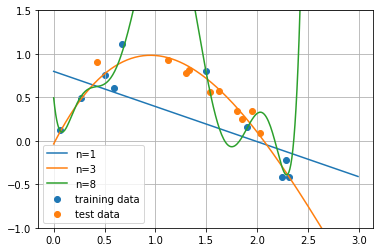

In [ ]:
np.random.seed(10)
train_size = 10
train_X = np.random.uniform(low=0, high=3.0, size=train_size)
train_t = np.sin(train_X * 0.5 * np.pi) + np.random.normal(0, 0.2, train_size)
test_X = np.random.uniform(low=0, high=3.0, size=train_size)
test_t = np.sin(test_X * 0.5 * np.pi) + np.random.normal(0, 0.2, train_size)

fig=plt.figure()
ax = fig.add_subplot()
ax.scatter(train_X, train_t,  label="training data")
ax.scatter(test_X, test_t,  label="test data")
degrees = [1, 3, 8]
for deg in degrees:
    poly = PolynomialFeatures(deg) # 次数が 1, 3, 8
    train_poly_X = poly.fit_transform(train_X.reshape(-1, 1))
    model4_1 = LinearRegression()
    model4_1.fit(train_poly_X, train_t)
    train_pred_y = model4_1.predict(train_poly_X)

    pred_x = np.arange(0, 3.0, 0.01)
    pred_poly_X = poly.fit_transform(pred_x.reshape(-1, 1))
    pred_y = model4_1.predict(pred_poly_X)
    ax.plot(pred_x, pred_y, label="n="+str(deg))
ax.grid()
ax.legend()
ax.set_ylim([-1., 1.5])

In [ ]:
print(model4_1.coef_)

[   0.     -11.566  111.295 -407.586  743.506 -723.145  381.153 -102.803
   11.125]


# リッジ回帰

(-1.5, 1.5)

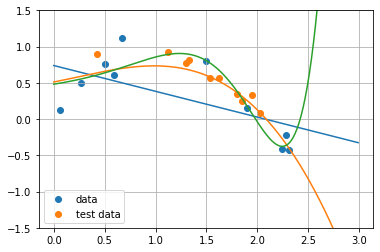

In [ ]:
fig=plt.figure()
ax = fig.add_subplot()
for deg in degrees:
    poly = PolynomialFeatures(deg) # 次数は6
    train_poly_X = poly.fit_transform(train_X.reshape(-1, 1))
    model4_2 = Ridge(alpha=1.0)
    model4_2.fit(train_poly_X, train_t)
    train_pred_y = model4_2.predict(train_poly_X)

    pred_x = np.arange(0, 3.0, 0.01)
    pred_poly_X = poly.fit_transform(pred_x.reshape(-1, 1))
    pred_y = model4_2.predict(pred_poly_X)

    ax.plot(pred_x, pred_y)
ax.grid()
ax.scatter(train_X, train_t,  label="data")
ax.scatter(test_X, test_t,  label="test data")
ax.legend()
ax.set_ylim([-1.5, 1.5])

In [ ]:
print(model4_2.coef_)

[ 0.     0.225  0.144  0.068  0.01  -0.029 -0.04  -0.015  0.013]


#５．ロジスティック回帰

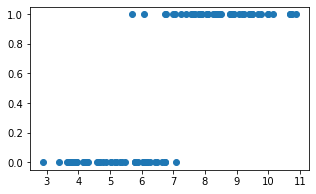

In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(123)
N = 50
X5 = np.r_[np.random.normal(8.5, 1.0, size=N), np.random.normal(5, 1.0, size=N)].reshape((2*N, -1))
t5 = np.r_[np.ones(N), np.zeros(N)]

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)
ax.scatter(X5,t5)
plt.show()

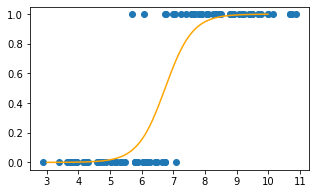

In [ ]:
model = LogisticRegression()
model.fit(X5, t5)

pred_x = np.arange(3, 10, 0.01)
pred_y = model.predict_proba(pred_x.reshape(-1, 1))
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)
ax.scatter(X5,t5)
ax.plot(pred_x, pred_y[:,1], c="orange")
plt.show()

#6. 2次元入力のロジスティック回帰

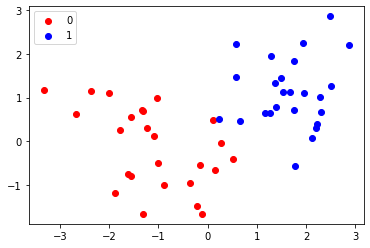

In [ ]:
np.random.seed(seed=30)
centers = [(-1, -0.125), (1.5, 1.5)]
X6, t6 = make_blobs(n_samples=50, n_features=2, centers=centers, cluster_std=0.8)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(X6[t6==0, 0], X6[t6==0, 1], c='red', marker='o', label='0')
plt.scatter(X6[t6==1, 0], X6[t6==1, 1], c='blue', marker='o', label='1')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 訓練
model6 = LogisticRegression()
model6.fit(X6, t6)

LogisticRegression()

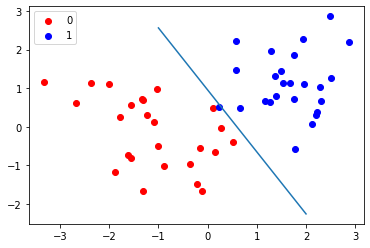

In [ ]:
xx = np.linspace(-1.0, 2.0, 10)
y_data = (-model6.coef_[0,0] * xx - model6.intercept_) / model6.coef_[0,1]
plt.scatter(X6[t6==0, 0], X6[t6==0, 1], c='red', marker='o', label='0')
plt.scatter(X6[t6==1, 0], X6[t6==1, 1], c='blue', marker='o', label='1')
plt.legend(loc='upper left')
plt.plot(xx, y_data)
plt.show()

In [ ]:
test_data = np.array([[-1, -3], [2, 5], [-1, 3]])
print(model6.predict_proba(test_data))
print(model6.predict(test_data))

[[0.999 0.001]
 [0.    1.   ]
 [0.368 0.632]]
[0 1 1]


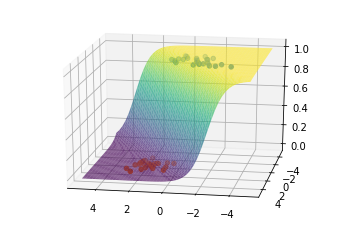

In [ ]:
xx_, yy_ = np.meshgrid(np.linspace(-5.0, 5.0, 50), np.linspace(-5.0, 5.0, 50))
xx_yy = np.vstack([xx_.flatten(),yy_.flatten()])
pred_ = model6.predict_proba(xx_yy.T)
pred_1 = pred_[:,0].reshape(50, 50)

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx_, yy_, pred_1, cmap='viridis', alpha=0.7)
ax.scatter3D(X6[t6==0, 0], X6[t6==0, 1], np.ones(25))
ax.scatter3D(X6[t6==1, 0], X6[t6==1, 1], np.zeros(25))
ax.view_init(elev=20, azim=100)
plt.show()

# 7. サポートベクターマシン

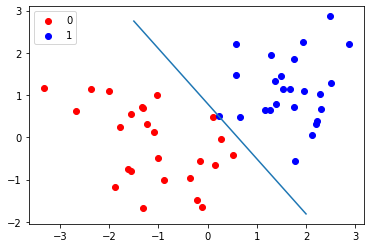

In [ ]:
# 学習
model7 = LinearSVC() 
model7.fit(X6, t6)

plt.scatter(X6[t6==0, 0], X6[t6==0, 1], c='red', marker='o', label='0')
plt.scatter(X6[t6==1, 0], X6[t6==1, 1], c='blue', marker='o', label='1')
plt.legend(loc='upper left')
xx = np.linspace(-1.5, 2.0, 10)
y_data = (-model7.coef_[0,0] * xx - model7.intercept_) / model7.coef_[0,1] 
plt.plot(xx, y_data)
plt.show()

In [ ]:
test_data = np.array([[-1, -3], [2, 5], [-1, 3]])
print(model7.predict(test_data))

[0 1 1]


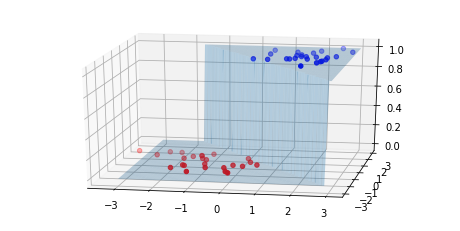

In [ ]:
xx_, yy_ = np.meshgrid(np.linspace(-3.0, 3.0, 100), np.linspace(-3.0, 3.0, 100))
xx_yy = np.vstack([xx_.flatten(),yy_.flatten()])
pred_ = model7.predict(xx_yy.T)
pred_1 = pred_.reshape(100, 100)

fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx_, yy_, pred_1, alpha=0.3)
ax.scatter3D(X6[t6==1, 0], X6[t6==1, 1], np.ones(X6[t6==1, 0].size), c="blue")
ax.scatter3D(X6[t6==0, 0], X6[t6==0, 1], np.zeros(X6[t6==0, 0].size), c="red")
ax.view_init(elev=20, azim=280)
plt.show()

#8. カーネル法を使ったサポートベクターマシン

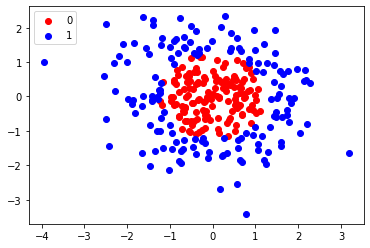

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# データ生成
X8, t8 = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
model = SVC()
model.fit(X8, t8)

 
plt.scatter(X8[t8==0, 0], X8[t8==0, 1], c='red', marker='o', label='0')
plt.scatter(X8[t8==1, 0], X8[t8==1, 1], c='blue', marker='o', label='1')
plt.legend(loc='upper left')

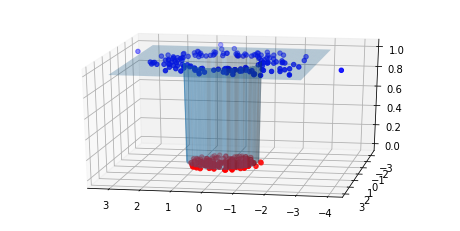

In [ ]:
xx_, yy_ = np.meshgrid(np.linspace(-3.0, 3.0, 100), np.linspace(-3.0, 3.0, 100))
xx_yy = np.vstack([xx_.flatten(),yy_.flatten()])
pred_ = model.predict(xx_yy.T)
pred_1 = pred_.reshape(100, 100)

fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx_, yy_, pred_1, alpha=0.3)
ax.scatter3D(X8[t8==1, 0], X8[t8==1, 1], np.ones(X8[t8==1, 0].size), c="blue")
ax.scatter3D(X8[t8==0, 0], X8[t8==0, 1], np.zeros(X8[t8==0, 0].size), c="red")
ax.view_init(elev=20, azim=100)
plt.show()

# 9. ニューラルネットワーク

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# データ読み込み
data = load_digits()
X = data.images.reshape(len(data.images), -1)
t = data.target

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
model = model = MLPClassifier(hidden_layer_sizes=(64, )) 
model.fit(X_train, t_train) # 学習
y_pred = model.predict(X_test) 
accuracy_score(y_pred, t_test) # 評価

0.9648148148148148

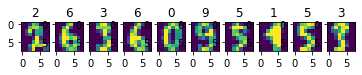

In [ ]:
fig = plt.figure()
N=10
for i in range(N):
    ax = fig.add_subplot(1, N, i+1)
    ax.imshow(X_test[i].reshape(8,8))
    ax.set_title(str(t_test[i]))
plt.show()

In [ ]:
for i in range(N):
    print(model.predict(X_test[i].reshape(1,-1)), end= " ")

[2] [6] [3] [6] [0] [9] [5] [1] [5] [3] 